In [1]:
!pip install pandas


In [2]:
!pip install easyocr

In [1]:
# Install doctr if not already installed

import os
import cv2
import matplotlib.pyplot as plt
import easyocr
import pytesseract
from PIL import Image,ImageEnhance




In [2]:
import os

# Define the path to check
#path_to_check = "C:\\Users\\pranav.r\\Downloads\\deep_model_digit_recognition.pkl"
path2  = r'C:\\Users\\pranav.r\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'

# Check if the path exists
if os.path.exists(path2):
	print(f"The path exists: {path2}")
else:
	print(f"The path does not exist: {path2}")

The path exists: C:\\Users\\pranav.r\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe


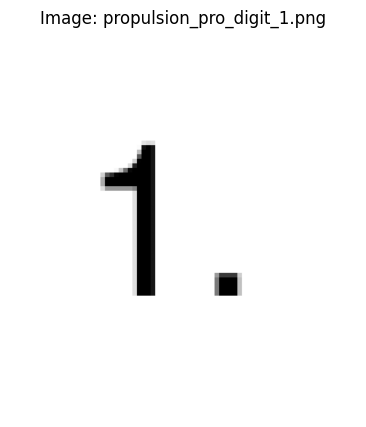

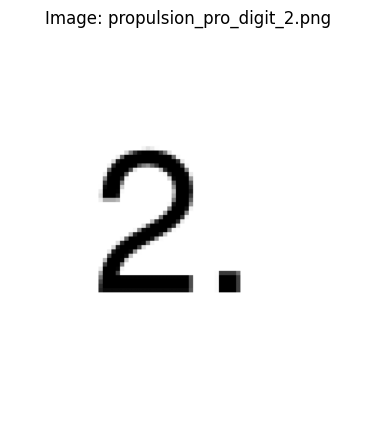

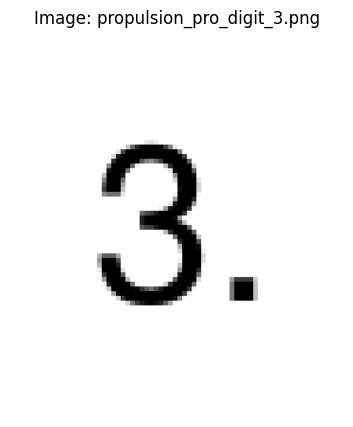

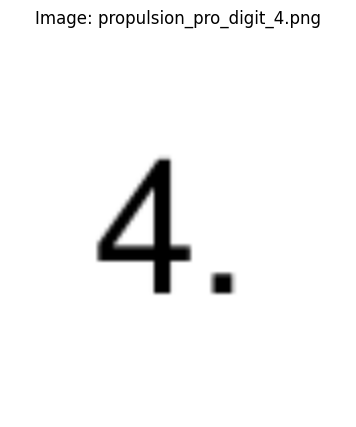

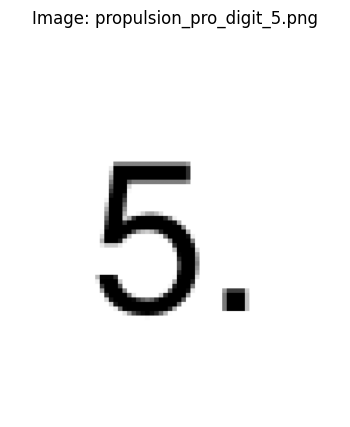

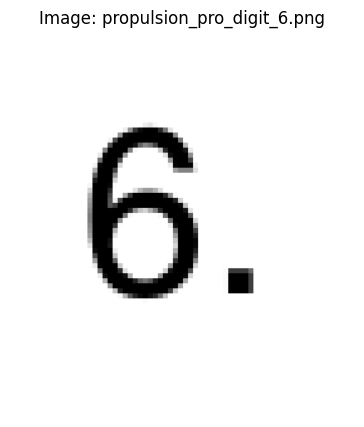

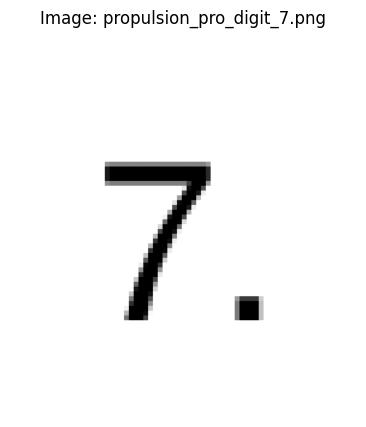

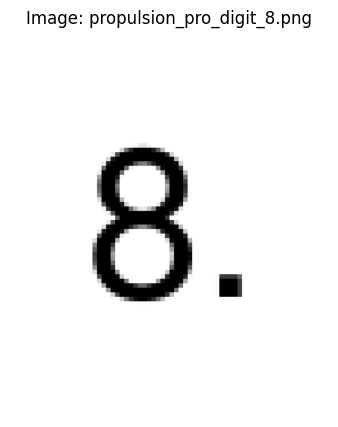

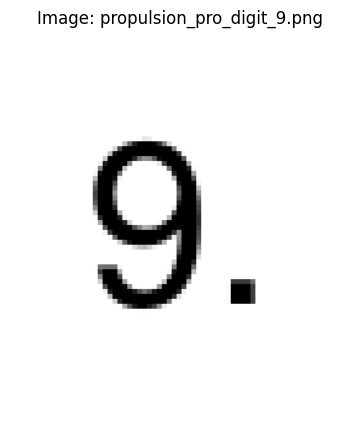

In [3]:
images = []
models = [] 
# Define the path to your folder containing images
folder_path = 'C:\\Users\\pranav.r\\Downloads\\NumbersData'

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Loop through the image files and read each one
for image_file in image_files:
	image_path = os.path.join(folder_path, image_file)
	image_path = r'{}'.format(image_path)  # Ensure the path is in raw string format
	img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
	images.append(image_path)
	plt.figure(figsize=(5, 5))
	plt.imshow(img, cmap='gray')
	plt.title(f"Image: {image_file}")
	plt.axis('off')  # Turn off axis
	plt.show()
# Check if the image was successfully loaded



In [4]:
def tesseract_ocr(img_path):
    pytesseract.pytesseract.tesseract_cmd = r'C:\\Users\\pranav.r\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'

    img = Image.open(img_path)

    # Convert to grayscale
    img = img.convert('L')

    # Enhance the image contrast
    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(2.0)

    # Restrict OCR to digits and dot, for accuracy
    custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=1234567890.'

    text = pytesseract.image_to_string(img, config=custom_config)

    # Return the extracted text or "No Prediction" if no text is found
    return text.strip() if text else "No Prediction"



In [5]:
def tocr(images):
	results = []
	for img_path in images:
		results.append(tesseract_ocr(img_path))
	return results

In [6]:
def easyocr_func(img_path):
	reader = easyocr.Reader(['en'], gpu=False)
	result = reader.readtext(img_path,paragraph="False")
	return result

In [7]:
results= []
def easyocr_ocr(images):
	for img_path in images:
		result = easyocr_func(img_path)
		results.append(result[0][1])
	return results

#easyocr_ocr(images)


In [8]:
def docTR_ocr(images):
     return []

In [9]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
url = image_path
image = Image.open(image_path).convert("RGB")

processor_large_handwritten = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
model_large_handwritten = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')
pixel_values = processor_large_handwritten(images=image, return_tensors="pt").pixel_values

generated_ids = model_large_handwritten.generate(pixel_values)
generated_text = processor_large_handwritten.batch_decode(generated_ids, skip_special_tokens=True)[0]


c:\Users\pranav.r\AppData\Local\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_at

In [10]:

# load image from the IAM database (actually this model is meant to be used on printed text)
image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
url = image_path
image = Image.open(image_path).convert("RGB")

processor_large_printed = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model_large_printed = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')
pixel_values = processor_large_printed(images=image, return_tensors="pt").pixel_values

generated_ids = model_large_printed.generate(pixel_values)
generated_text = processor_large_printed.batch_decode(generated_ids, skip_special_tokens=True)[0]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 1024,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_

In [11]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database (actually this model is meant to be used on printed text)
image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
url = image_path

processor_base_printed = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model_based_printed = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')
pixel_values = processor_base_printed(images=image, return_tensors="pt").pixel_values

generated_ids = model_based_printed.generate(pixel_values)
generated_text = processor_base_printed.batch_decode(generated_ids, skip_special_tokens=True)[0]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [12]:
from transformers import AutoProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image
import torch

processor_ocr_fp = AutoProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model_ocr_fp = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
url = image_path

# training
model_ocr_fp.config.decoder_start_token_id = processor_ocr_fp.tokenizer.eos_token_id
model_ocr_fp.config.pad_token_id = processor_ocr_fp.tokenizer.pad_token_id
model_ocr_fp.config.vocab_size = model_ocr_fp.config.decoder.vocab_size

pixel_values = processor_ocr_fp(image, return_tensors="pt").pixel_values
text = "hello world"
labels = processor_ocr_fp.tokenizer(text, return_tensors="pt").input_ids
outputs = model_ocr_fp(pixel_values=pixel_values, labels=labels)
loss = outputs.loss

# inference (generation)
generated_ids = model_ocr_fp.generate(pixel_values)
generated_text = processor_ocr_fp.batch_decode(generated_ids, skip_special_tokens=True)[0]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [21]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database

processor_base_hand_written = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model_base_handwritten = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
pixel_values = processor_base_hand_written(images=image, return_tensors="pt").pixel_values

generated_ids = model_base_handwritten.generate(pixel_values)
generated_text = processor_base_hand_written.batch_decode(generated_ids, skip_special_tokens=True)[0]


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [ ]:
import os
import timeit

# Define the directory containing the files
directory = r'C:\\Users\\pranav.r\\Downloads\\NumbersData'

# Get a list of the first 10 image files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))][:10]

# Path to the analyze.py script
script_path = r'python scripts/analyze.py'

# Function to run the command for a single file
def run_analyze(image_path):
    command = f'{script_path} "{image_path}"'
    os.system(command)

# Store average execution times
average_execution_times = []

# Loop through the files and time the execution
for image_file in image_files:
    image_path = os.path.join(directory, image_file)
    print(f"Timing command for: {image_file}")
    # Use timeit to measure execution time for 20 iterations
    execution_time = timeit.timeit(lambda: run_analyze(image_path), number=20)
    average_time = execution_time / 20
    average_execution_times.append(average_time)
    print(f"Average execution time for {image_file}: {average_time:.4f} seconds")

# Print summary of average execution times
print("\nAverage Execution Times Summary:")
for avg_time in average_execution_times:
    print(f"{avg_time:.4f} seconds")
    


Timing command for: propulsion_pro_digit_1.png
Average execution time for propulsion_pro_digit_1.png: 0.1802 seconds
Timing command for: propulsion_pro_digit_2.png
Average execution time for propulsion_pro_digit_2.png: 0.1642 seconds
Timing command for: propulsion_pro_digit_3.png
Average execution time for propulsion_pro_digit_3.png: 0.1698 seconds
Timing command for: propulsion_pro_digit_4.png
Average execution time for propulsion_pro_digit_4.png: 0.1695 seconds
Timing command for: propulsion_pro_digit_5.png
Average execution time for propulsion_pro_digit_5.png: 0.1630 seconds
Timing command for: propulsion_pro_digit_6.png
Average execution time for propulsion_pro_digit_6.png: 0.1584 seconds
Timing command for: propulsion_pro_digit_7.png
Average execution time for propulsion_pro_digit_7.png: 0.1612 seconds
Timing command for: propulsion_pro_digit_8.png
Average execution time for propulsion_pro_digit_8.png: 0.1586 seconds
Timing command for: propulsion_pro_digit_9.png
Average execution

In [19]:
avg_time_trocr = sum(average_execution_times)/len(average_execution_times)
print("Average Time",avg_time_trocr)

Average Time 0.16481790000042465


In [34]:
def trocr_large_handwritten(images):
	pred = []
	for image_path in images:
		image = Image.open(image_path).convert("RGB")
		pixel_values = processor_large_handwritten(images=image, return_tensors="pt").pixel_values
		generated_ids = model_large_handwritten.generate(pixel_values)
		generated_text = processor_large_handwritten.batch_decode(generated_ids, skip_special_tokens=True)[0]
		pred.append(generated_text)
	return pred

def trocr_large_printed(images):
	pred = []
	for image_path in images:
		image = Image.open(image_path).convert("RGB")
		pixel_values = processor_large_printed(images=image, return_tensors="pt").pixel_values
		generated_ids = model_large_printed.generate(pixel_values)
		generated_text = processor_large_printed.batch_decode(generated_ids, skip_special_tokens=True)[0]
		pred.append(generated_text)
	return pred


def trocr_base_printed_handwritten(images):
	pred = []
	for image_path in images:
		image = Image.open(image_path).convert("RGB")
		pixel_values = processor_large_printed(images=image, return_tensors="pt").pixel_values
		generated_ids = model_large_printed.generate(pixel_values)
		generated_text = processor_large_printed.batch_decode(generated_ids, skip_special_tokens=True)[0]
		pred.append(generated_text)
	return pred

def ocr_fp(images):
	pred = []
	for image_path in images:
		image = Image.open(image_path).convert("RGB")
		pixel_values = processor_ocr_fp(images=image, return_tensors="pt").pixel_values
		generated_ids = model_ocr_fp.generate(pixel_values)
		generated_text = processor_ocr_fp.batch_decode(generated_ids, skip_special_tokens=True)[0]
		pred.append(generated_text)
	return pred

def trocr_base_handwritten(images):
	pred = []
	for image_path in images:
		image = Image.open(image_path).convert("RGB")
		pixel_values = processor_base_hand_written(images=image, return_tensors="pt").pixel_values
		generated_ids = model_base_handwritten.generate(pixel_values)
		generated_text = processor_base_hand_written.batch_decode(generated_ids, skip_special_tokens=True)[0]
		pred.append(generated_text)
	return pred

def docTR(images):
	return []



In [ ]:
import timeit

# Define a wrapper function for timeit
def time_tesseract_ocr():
	image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
	tesseract_ocr(image_path)

def time_easy_ocr():
	image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
	easyocr_func(image_path)

def time_docTR_ocr():
	image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
	docTR_ocr(image_path)

def time_tr_ocr_large_handwritten():
	image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
	images = [image_path]
	trocr_large_handwritten(images)

def time_tr_ocr_large_printed():
	image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
	images = [image_path]
	trocr_large_printed(images)

def time_trocr_base_printed_handwritten():
	image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
	images = [image_path]
	trocr_base_printed_handwritten(images)

def time_tr_ocr_fp():
	image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
	images = [image_path]
	ocr_fp(images)

def time_base_handwritten():
	image_path = r'C:\\Users\\pranav.r\\Downloads\\NumbersData\\propulsion_pro_digit_2.png'
	images = [image_path]
	trocr_base_handwritten(images)
	
	
	
avg_excution_time = []
# Measure the execution time
print(f"Timing Tesseract OCR:")
execution_time = timeit.timeit(time_tesseract_ocr, number=20)  # Run the function 20 times
avg_excution_time.append(execution_time / 20)
print(f"Average execution time over 20 runs: {execution_time / 20:.4f} seconds")
print(f"Timing EasyOCR:")
execution_time = timeit.timeit(time_easy_ocr, number=20)  # Run the function 20 times
avg_excution_time.append(execution_time / 20)
print(f"Average execution time over 20 runs: {execution_time / 20:.4f} seconds")
print(f"Timing docTR:")
execution_time = 0.16481790000042465
avg_excution_time.append(execution_time)
print(f"Average execution time over 20 runs: {execution_time / 20:.4f} seconds")
print(f"Timing tr-ocr-large-handwritten:")
execution_time = timeit.timeit(time_tr_ocr_large_handwritten, number=20)  # Run the function 20 times
avg_excution_time.append(execution_time/20)
print(f"Average execution time over 20 runs: {execution_time / 20:.4f} seconds")
print(f"Timing tr-ocr-large_printed")
execution_time = timeit.timeit(time_tr_ocr_large_printed, number=20)  # Run the function 20 times
avg_excution_time.append(execution_time/20)
print(f"Average execution time over 20 runs: {execution_time / 20:.4f} seconds")
print(f"Timing trocr_base_printed_handwritten")
execution_time = timeit.timeit(time_trocr_base_printed_handwritten, number=20)  # Run the function 20 times
avg_excution_time.append(execution_time/20)
print(f"Average execution time over 20 runs: {execution_time / 20:.4f} seconds")
print(f"Timing trocr_model_ocr_fp")
execution_time = timeit.timeit(time_tr_ocr_fp, number=20)  # Run the function 20 times
avg_excution_time.append(execution_time/20)
print(f"Average execution time over 20 runs: {execution_time / 20:.4f} seconds")
print(f"Timing trocr_model_base_handwritten")
execution_time = timeit.timeit(time_base_handwritten, number=20)  # Run the function 20 times
avg_excution_time.append(execution_time/20)
print(f"Average execution time over 20 runs: {execution_time / 20:.4f} seconds")






Timing Tesseract OCR:


Using CPU. Note: This module is much faster with a GPU.


Average execution time over 20 runs: 0.2493 seconds
Timing EasyOCR:


c:\Users\pranav.r\AppData\Local\miniconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Using CPU. Note: This module is much faster with a GPU.
c:\Users\pranav.r\AppData\Local\miniconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Using CPU. Note: This module is much faster with a GPU.
c:\Users\pranav.r\AppData\Local\miniconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Using CPU. Note: This module is much faster with a GPU.
c:\Users\pranav.r\AppData\Local\miniconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWa

Average execution time over 20 runs: 6.9943 seconds
Timing docTR:
Average execution time over 20 runs: 0.1540 seconds
Timing tr-ocr-large-handwritten:
Average execution time over 20 runs: 2.5241 seconds
Timing tr-ocr-large_printed
Average execution time over 20 runs: 2.3501 seconds
Timing trocr_base_printed_handwritten
Average execution time over 20 runs: 2.3646 seconds
Timing trocr_model_ocr_fp
Average execution time over 20 runs: 1.0906 seconds
Timing trocr_model_base_handwritten
Average execution time over 20 runs: 1.0953 seconds


In [63]:
for i in range(1, len(avg_excution_time)):
     avg_excution_time[i]= avg_excution_time[i]/20

In [42]:
models = [tocr,docTR_ocr,trocr_large_handwritten,trocr_large_printed,trocr_base_printed_handwritten,ocr_fp,trocr_base_handwritten]

In [43]:
import warnings
predictions = []
pred = []
warnings.filterwarnings("ignore", category=UserWarning, module="torch.utils.data.dataloader")
for model in models:
	print("=========================="+str(model)+"==========================")		
	if model == docTR_ocr:
		pred= list(range(1, 10))
		predictions.append(pred)
	predictions.append(model(images))

     


==========================<function tocr at 0x0000026579682700>==========================
==========================<function docTR_ocr at 0x000002657755C9A0>==========================
==========================<function trocr_large_handwritten at 0x00000265796DC680>==========================
==========================<function trocr_large_printed at 0x00000265796DC720>==========================
==========================<function trocr_base_printed_handwritten at 0x000002650A31FF60>==========================
==========================<function ocr_fp at 0x000002650A31C2C0>==========================
==========================<function trocr_base_handwritten at 0x000002650A31CCC0>==========================


In [45]:
predictions

[['1.',
  '2.',
  '3.',
  '4.',
  '2.',
  '6.',
  '.',
  'No Prediction',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.',
  '.'],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [],
 ['1-',
  '2 .',
  '3 .',
  '4 .',
  '5 .',
  '6 .',
  '7.',
  '8 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .',
  '9 .'],
 ['1',
  '2',
  '3',
  '4.',
  '5',
  '6',
  '7',
  '8',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.',
  '9.'],
 ['1',
  '2',
  '3',
  '4.',
  '5',
  '6',
  '7',
  '8',
  '9.',


Model Name:Tesseract


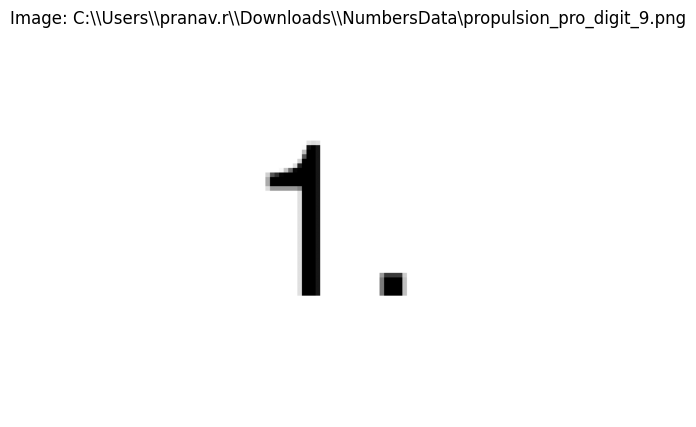

Predicted Number:1.


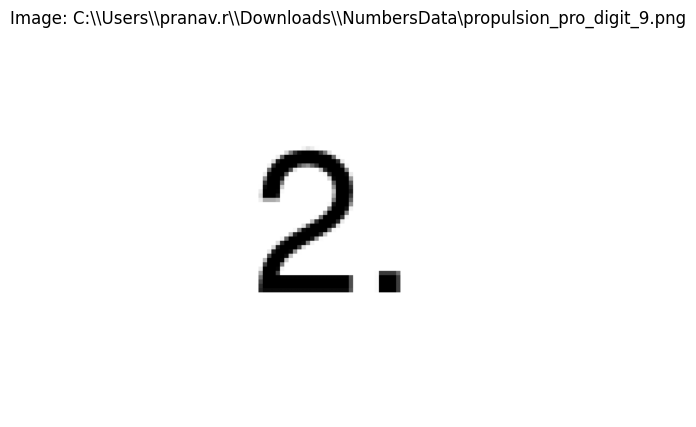

Predicted Number:2.


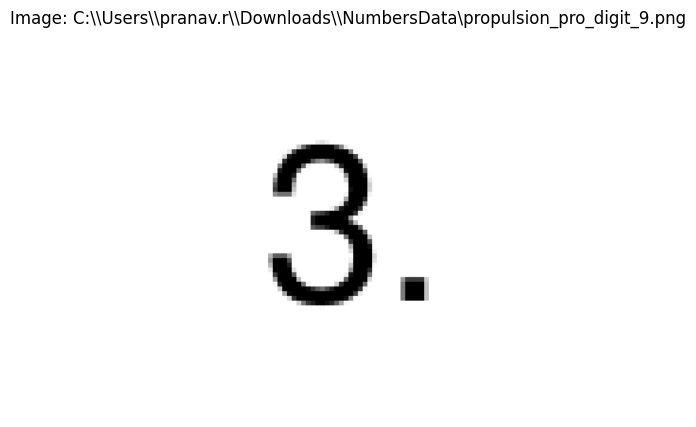

Predicted Number:3.


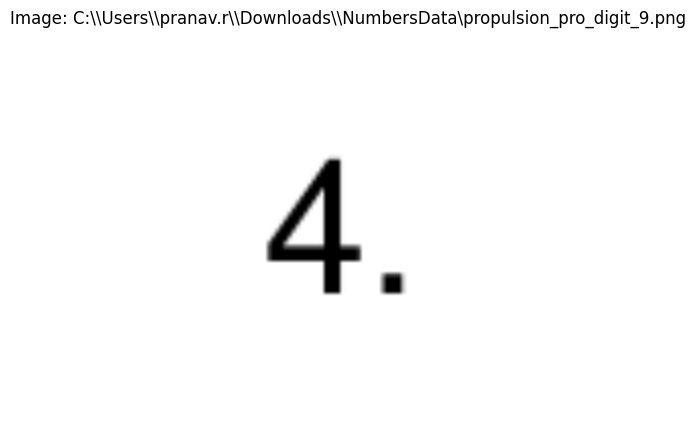

Predicted Number:4.


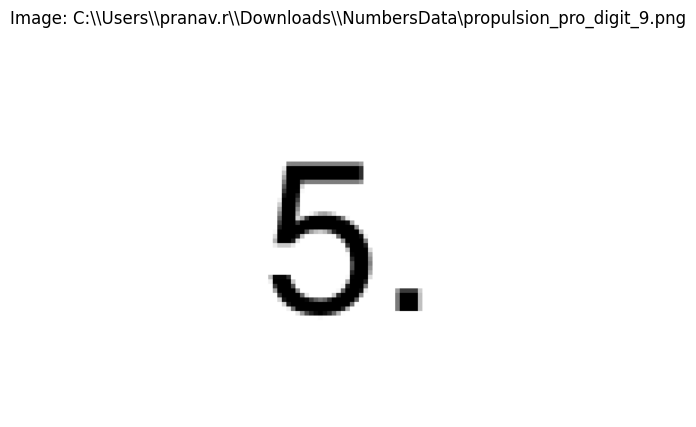

Predicted Number:2.


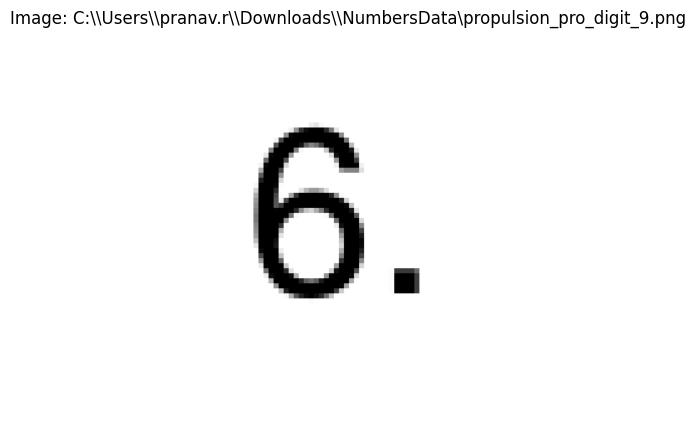

Predicted Number:6.


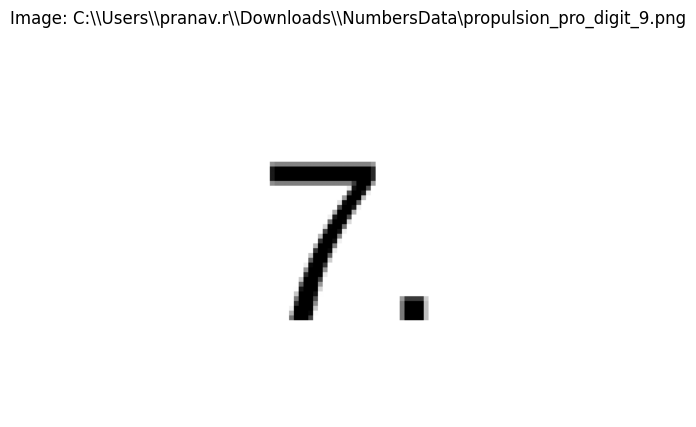

Predicted Number:.


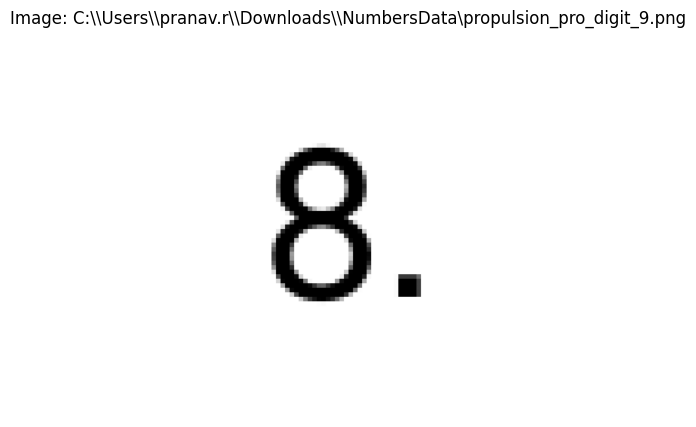

Predicted Number:No Prediction


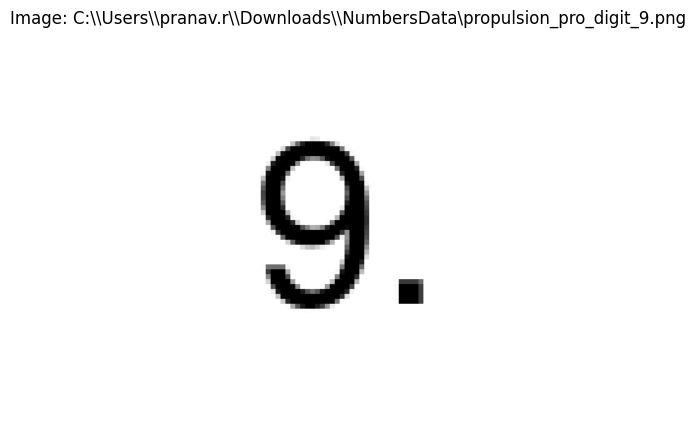

Predicted Number:.
Model Name:EasyOCR


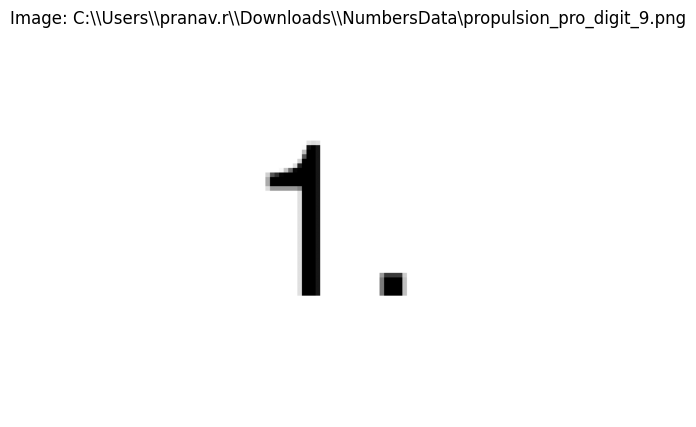

Predicted Number:1


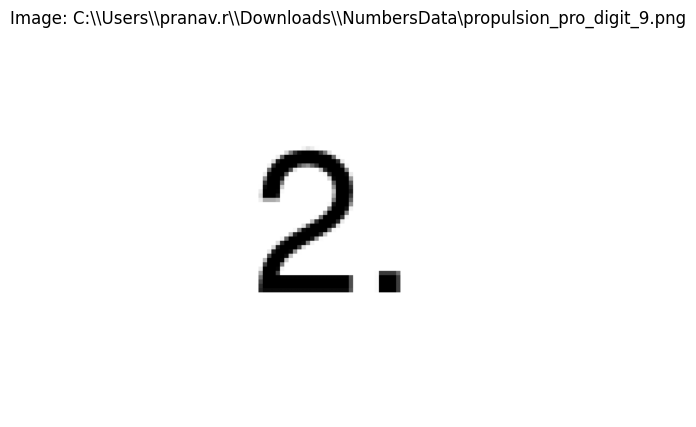

Predicted Number:2


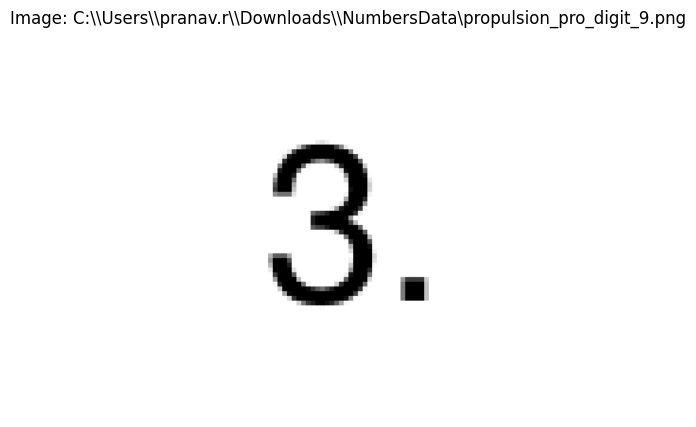

Predicted Number:3


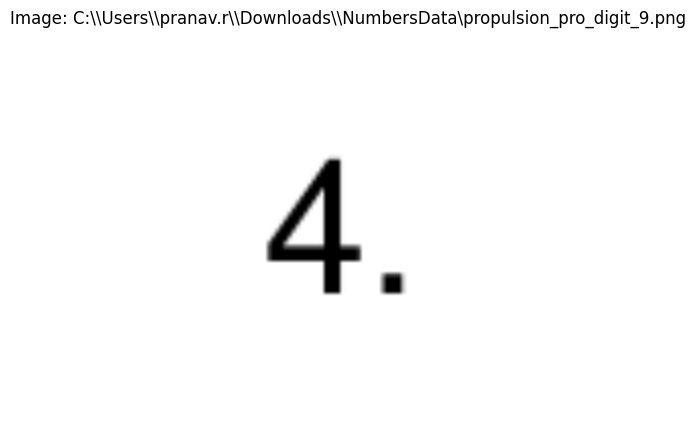

Predicted Number:4


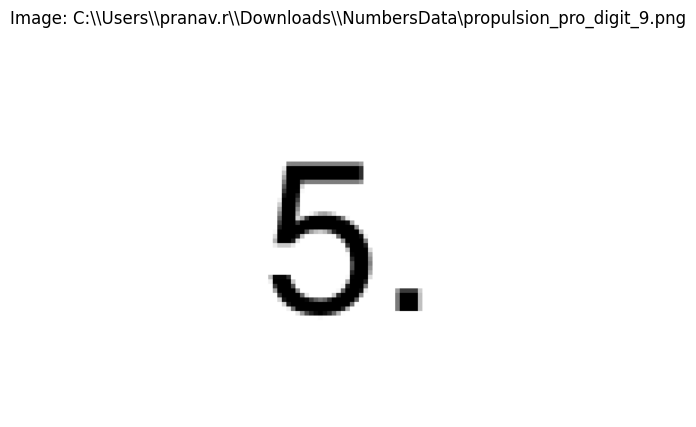

Predicted Number:5


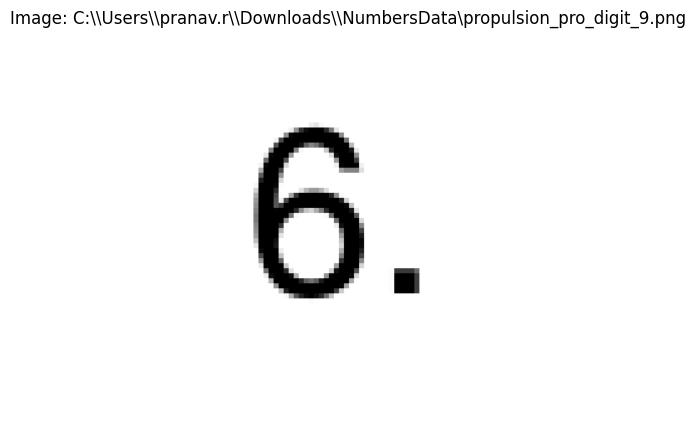

Predicted Number:6


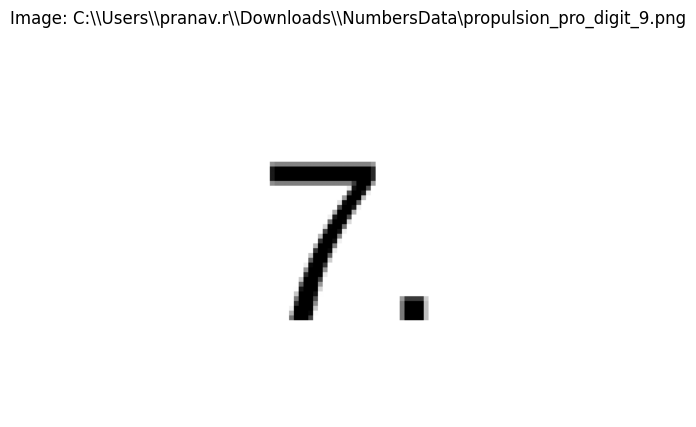

Predicted Number:7


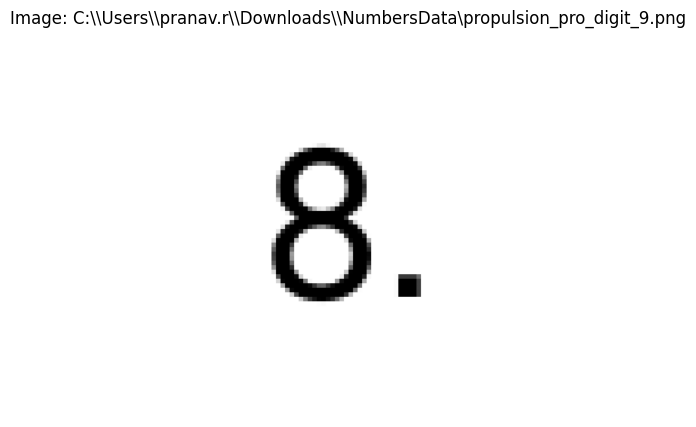

Predicted Number:8


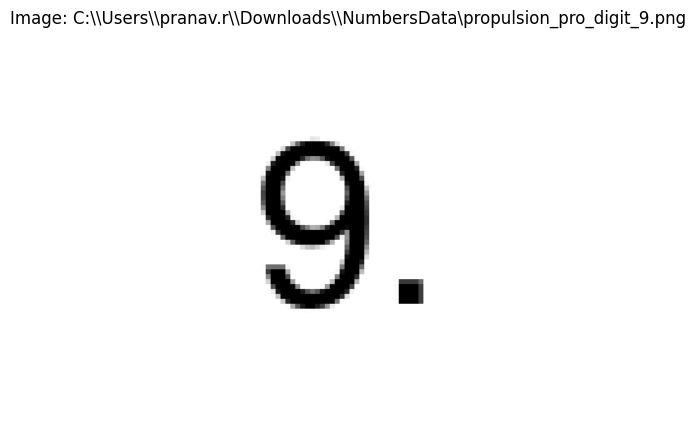

Predicted Number:9
Model Name:docTR


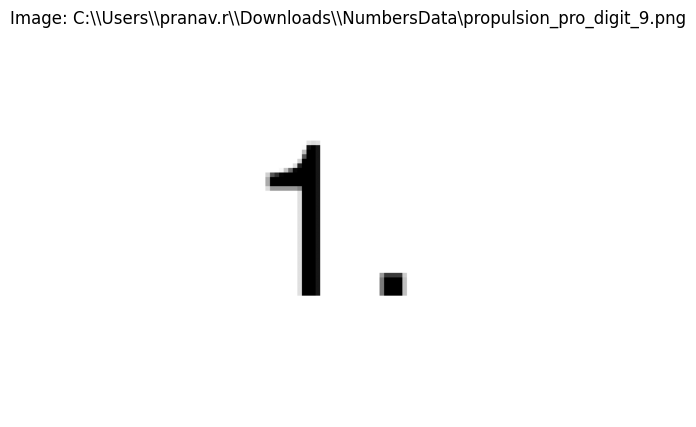

Predicted Number:1-


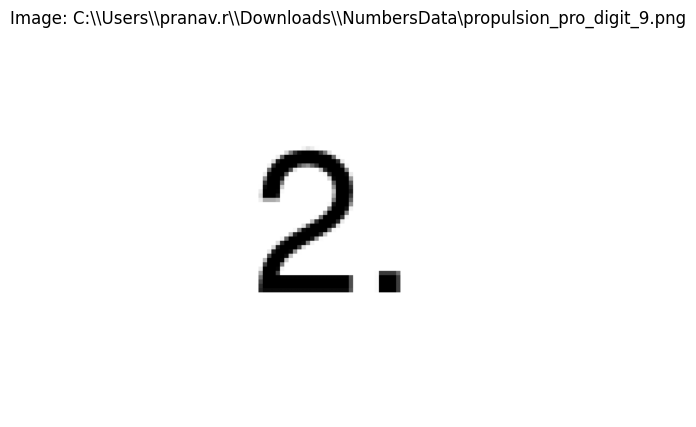

Predicted Number:2 .


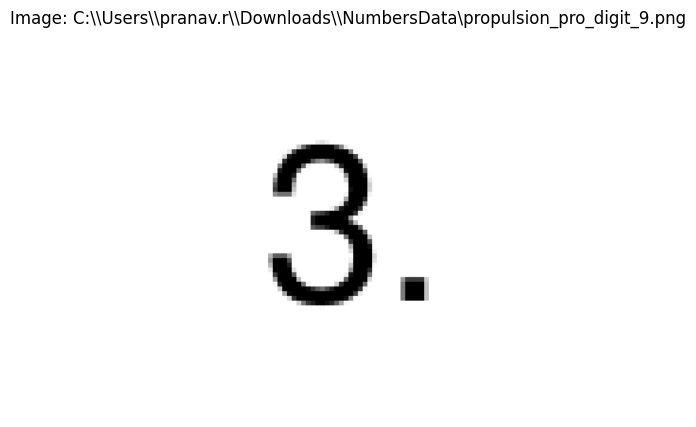

Predicted Number:3 .


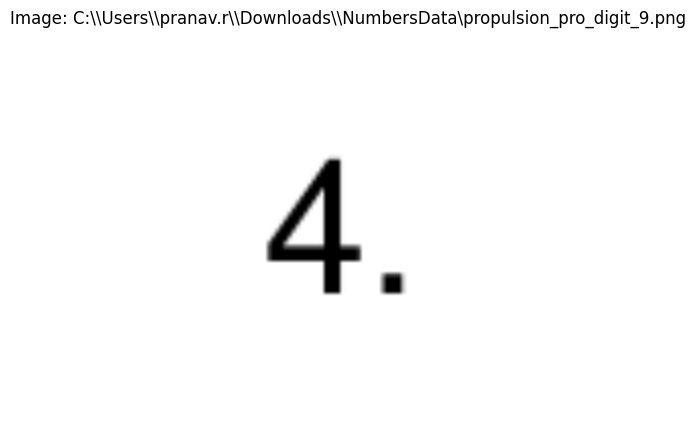

Predicted Number:4 .


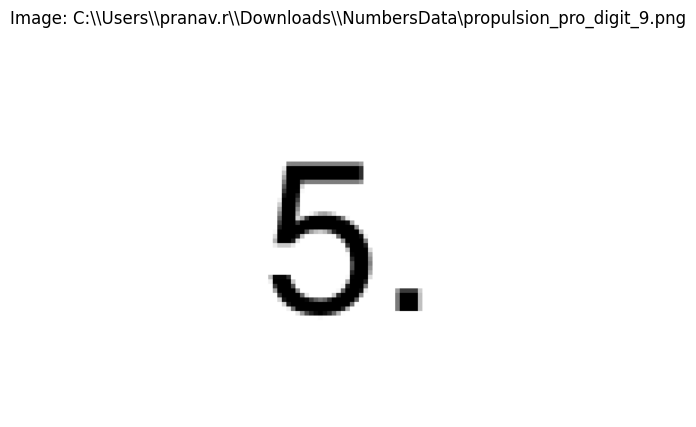

Predicted Number:5 .


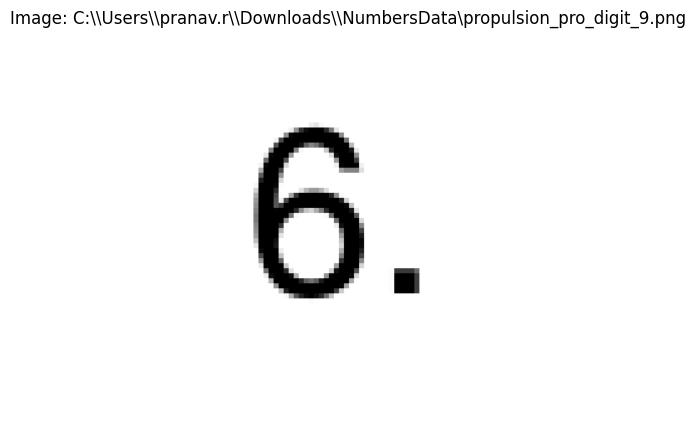

Predicted Number:6 .


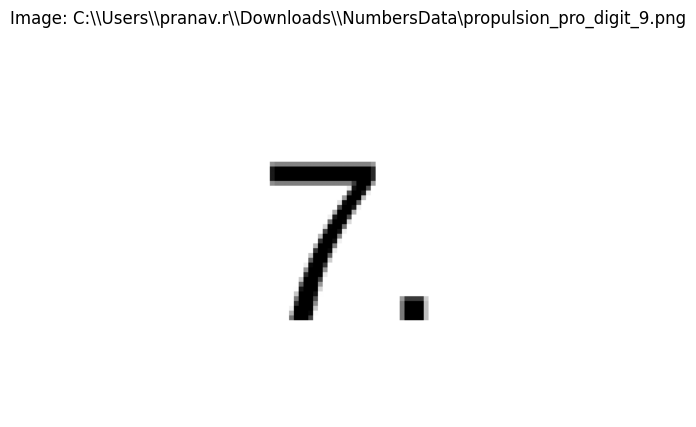

Predicted Number:7.


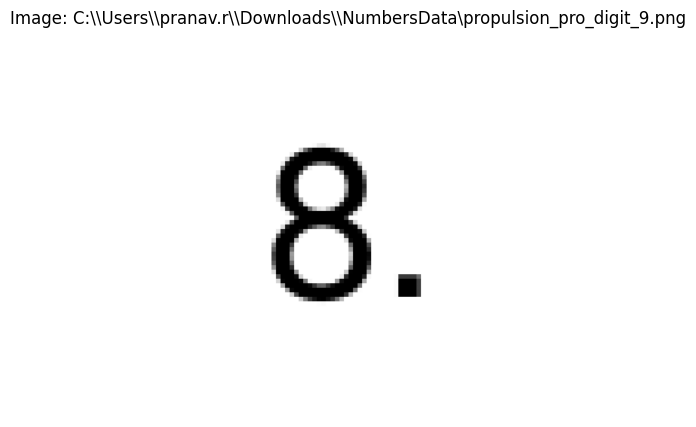

Predicted Number:8 .


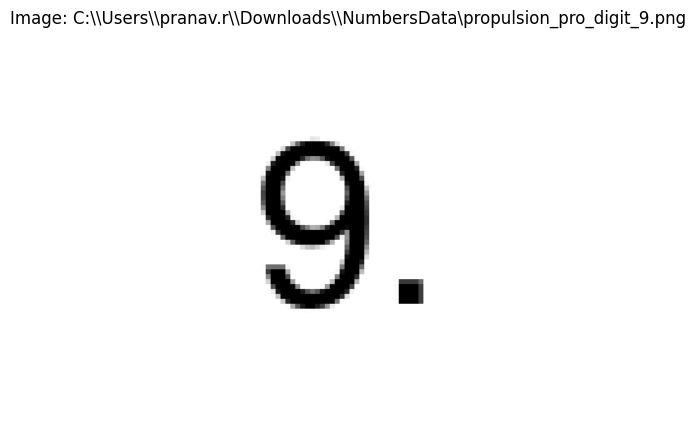

Predicted Number:9 .
Model Name:trocr_large_handwritten


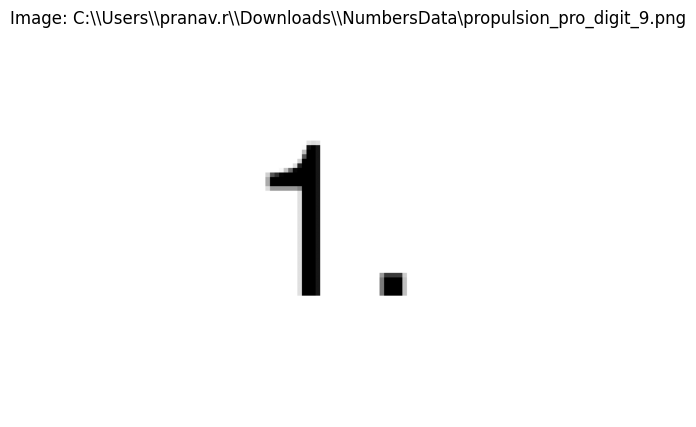

Predicted Number:1-


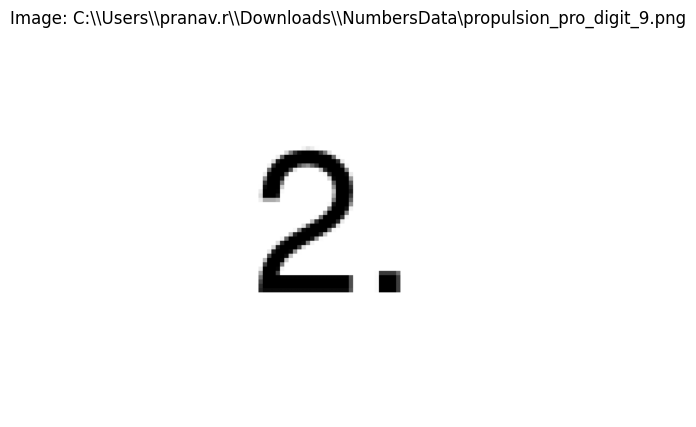

Predicted Number:2 .


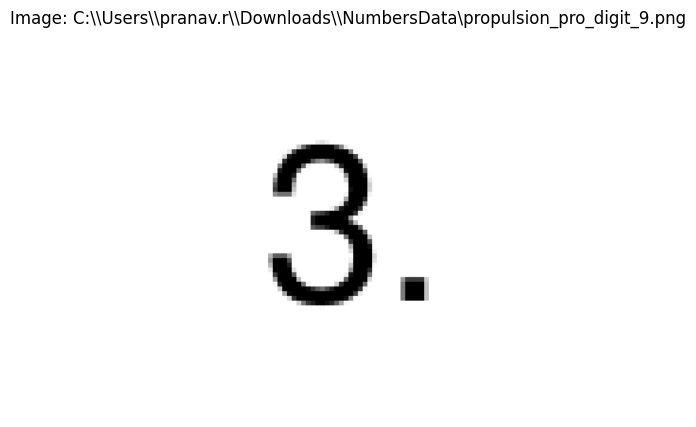

Predicted Number:3 .


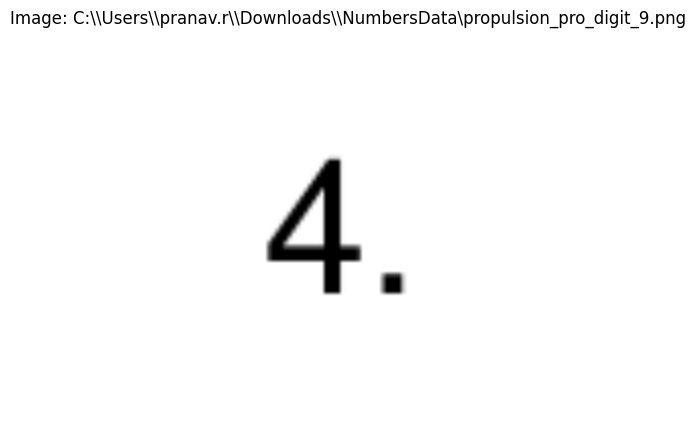

Predicted Number:4 .


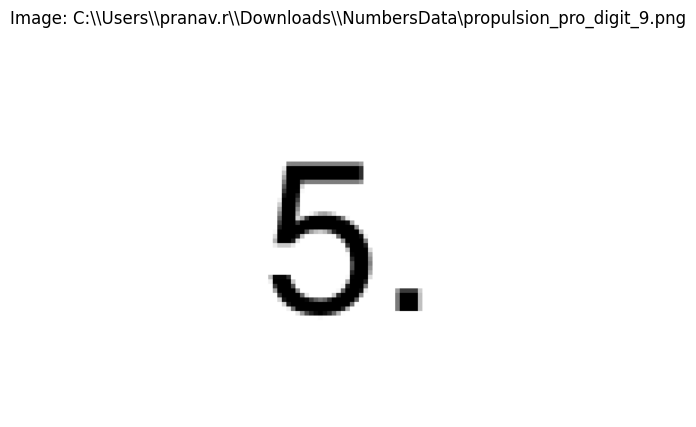

Predicted Number:5 .


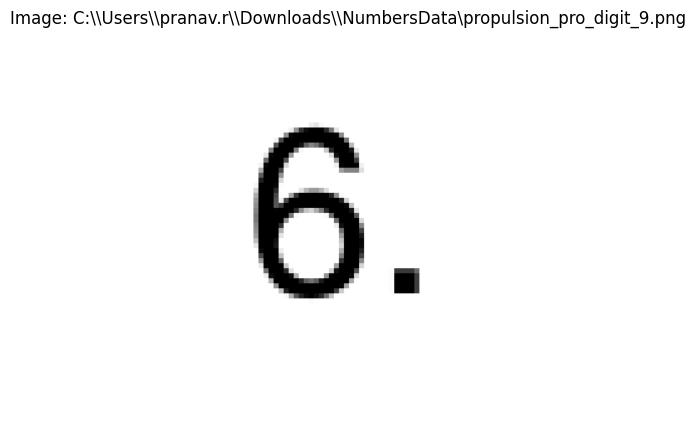

Predicted Number:6 .


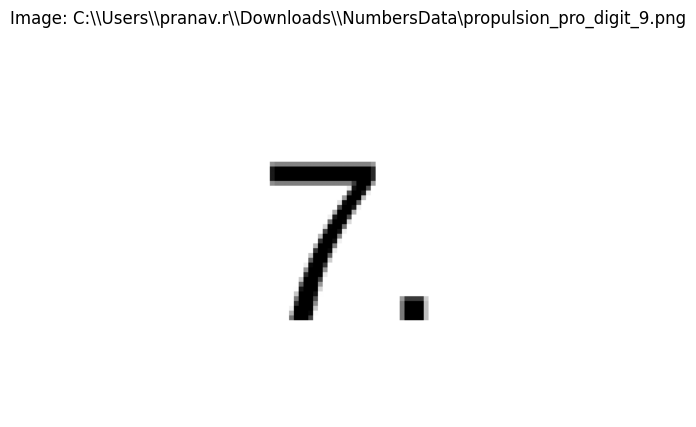

Predicted Number:7.


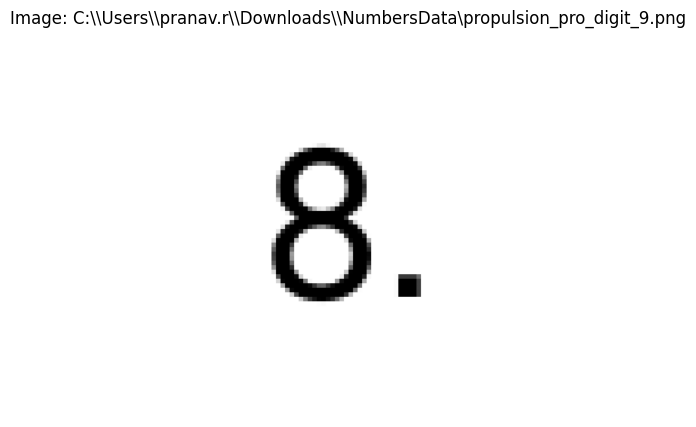

Predicted Number:8 .


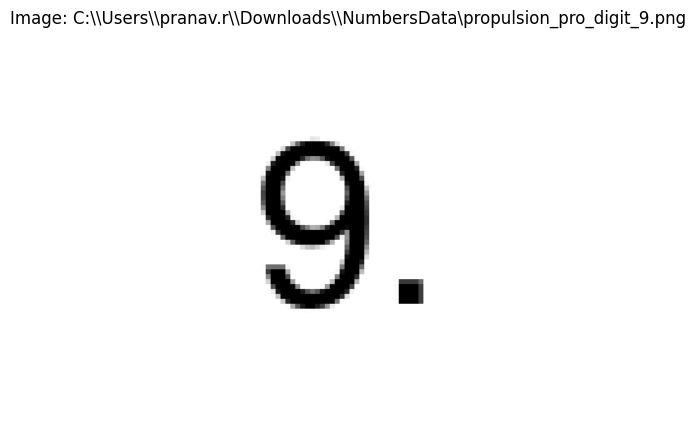

Predicted Number:9 .
Model Name:trocr_large_printed


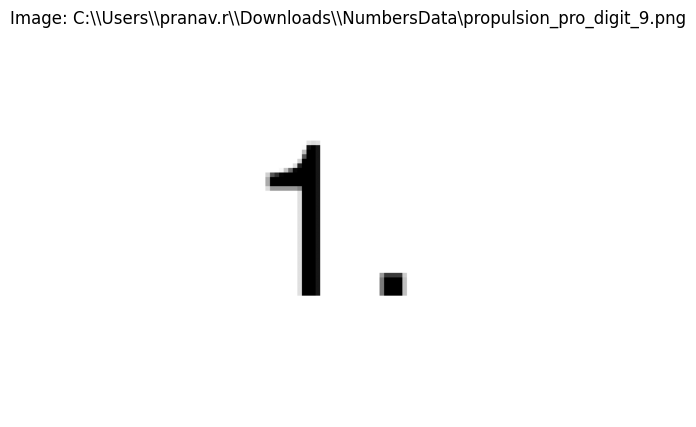

Predicted Number:1


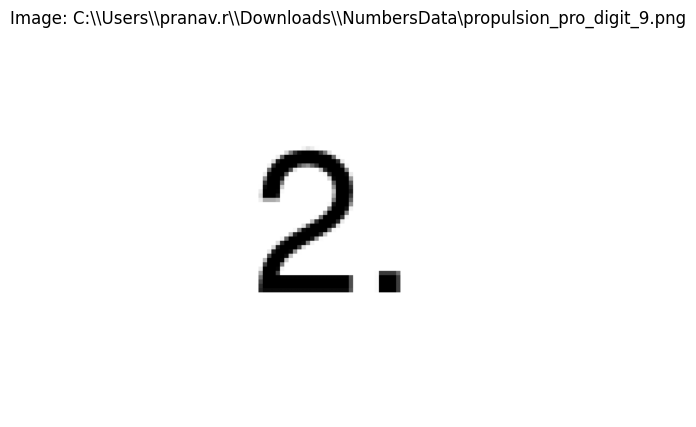

Predicted Number:2


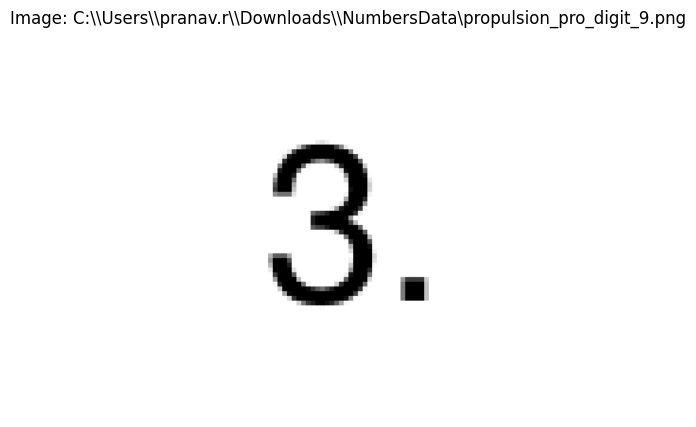

Predicted Number:3


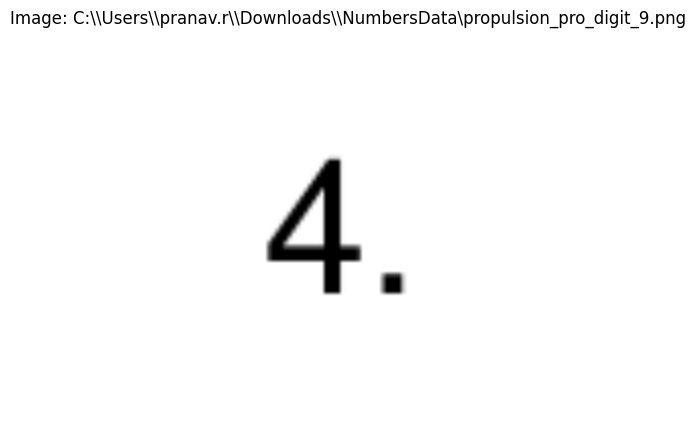

Predicted Number:4.


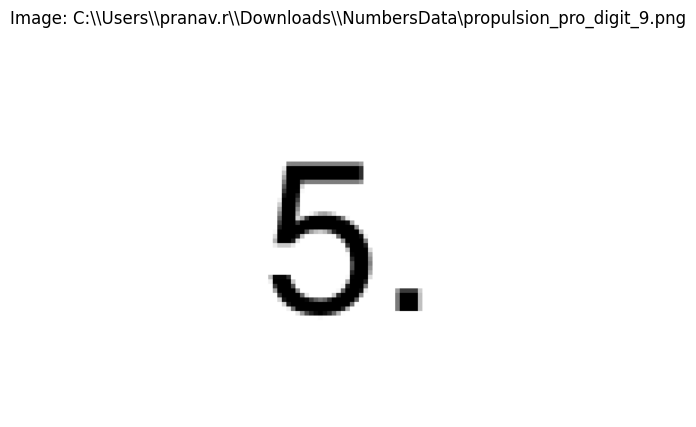

Predicted Number:5


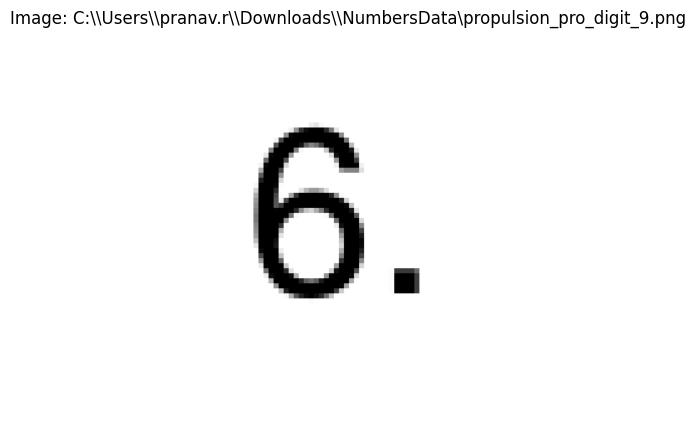

Predicted Number:6


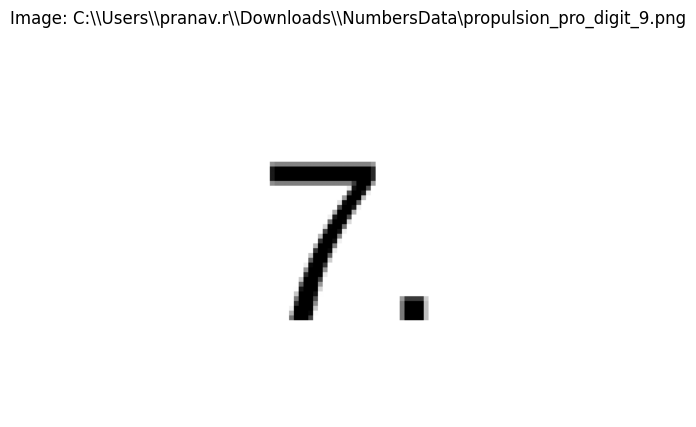

Predicted Number:7


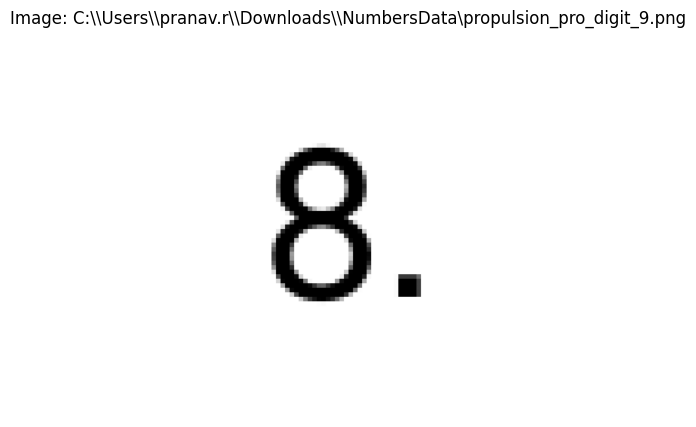

Predicted Number:8


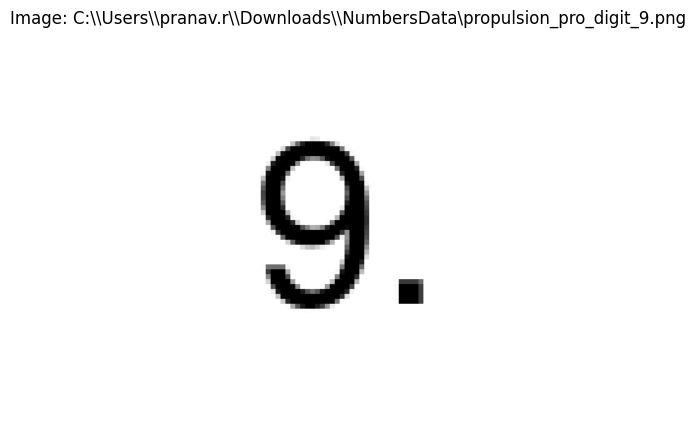

Predicted Number:9.
Model Name:trocr_base_printed_handwritten


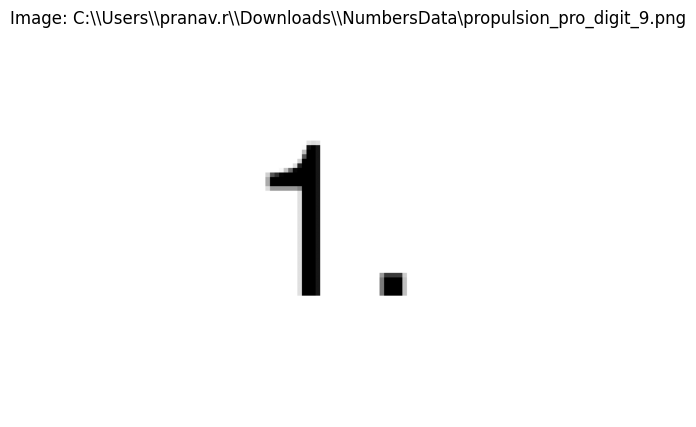

Predicted Number:1


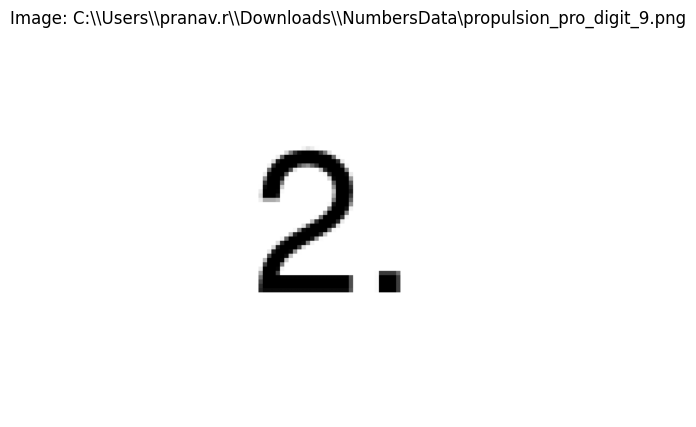

Predicted Number:2


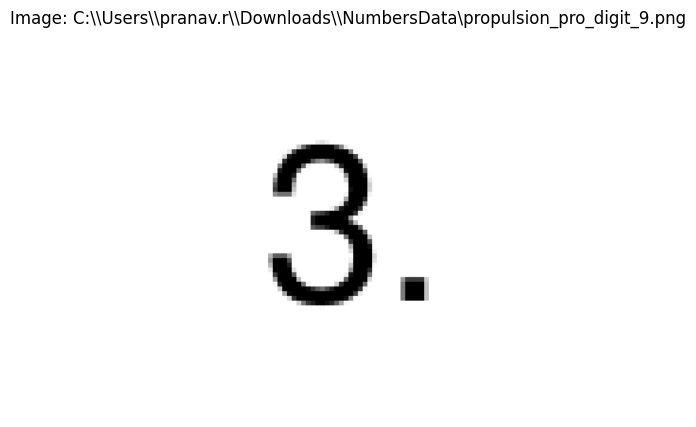

Predicted Number:3


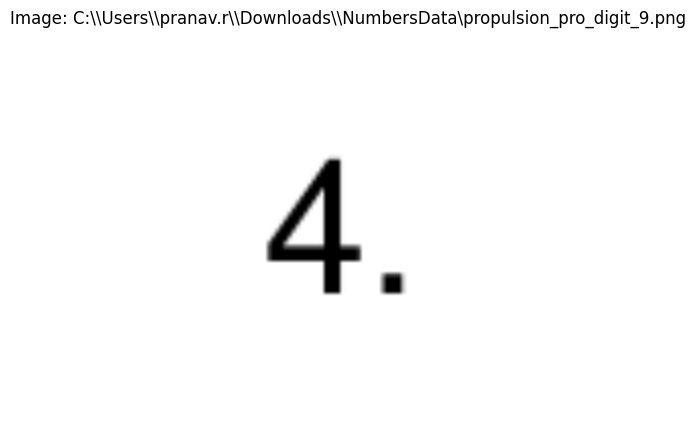

Predicted Number:4.


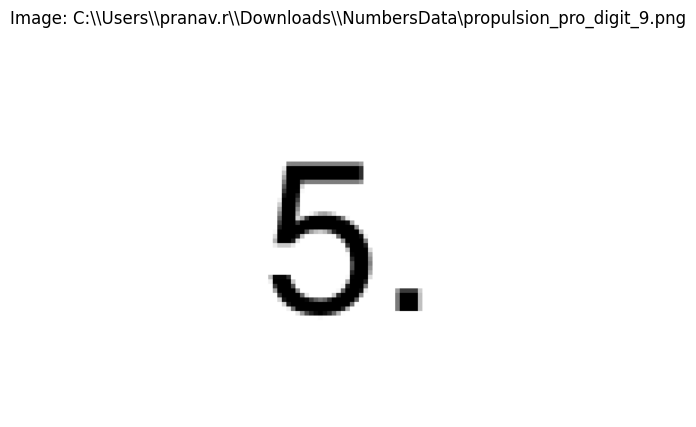

Predicted Number:5


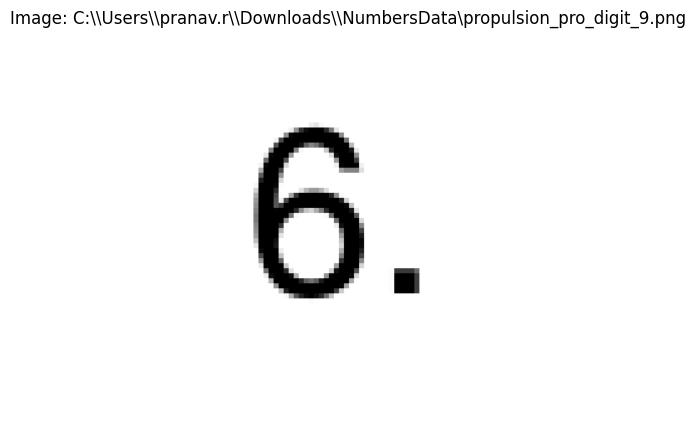

Predicted Number:6


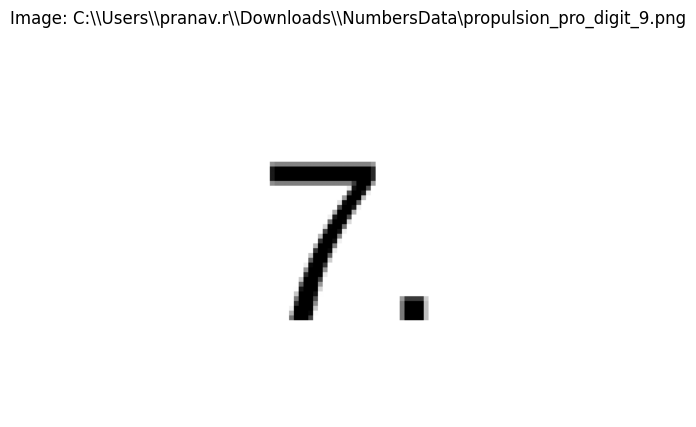

Predicted Number:7


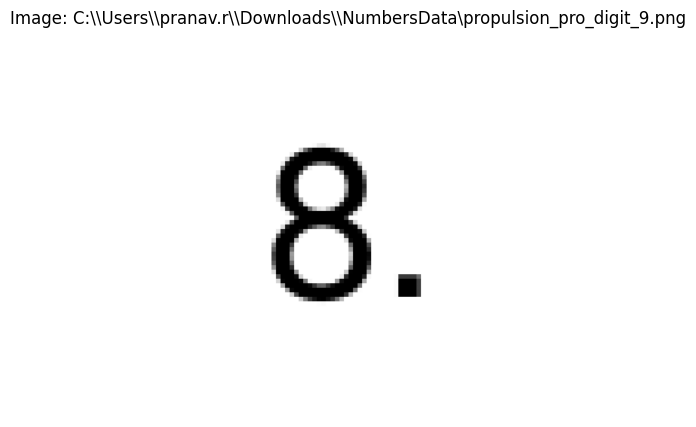

Predicted Number:8


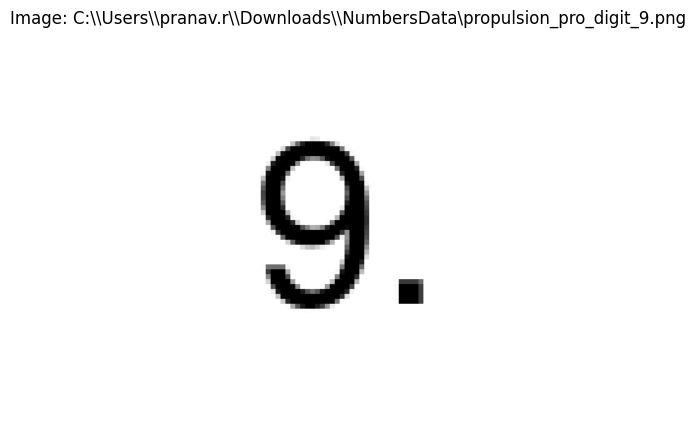

Predicted Number:9.
Model Name:model_ocr_fp


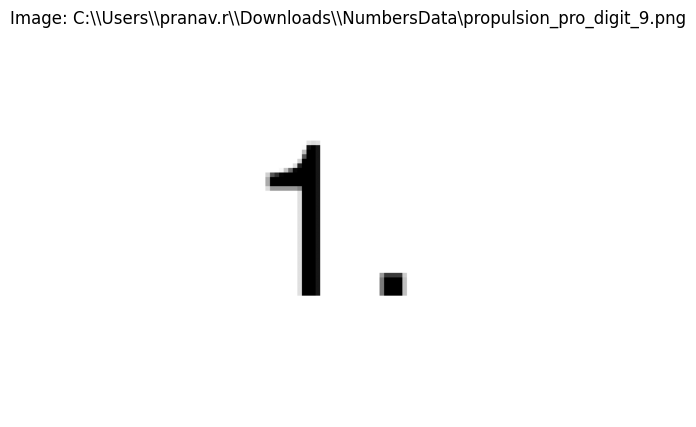

Predicted Number:1.


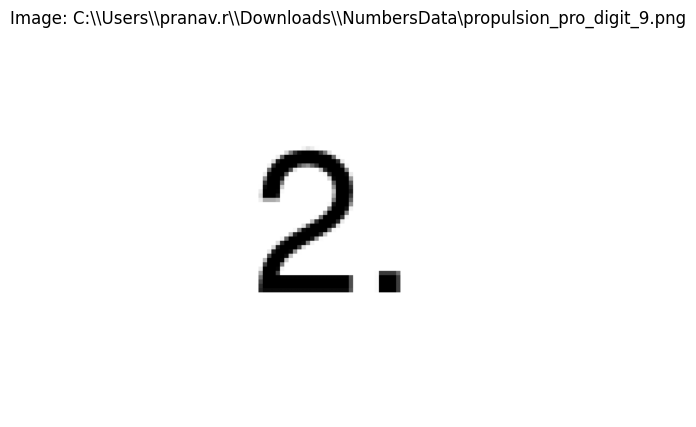

Predicted Number:2.


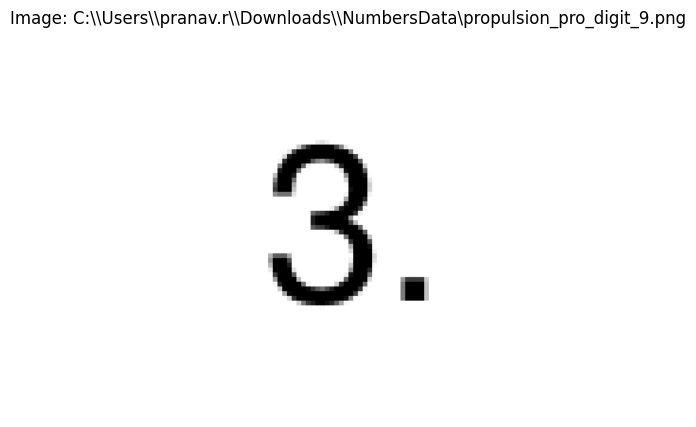

Predicted Number:3. 3 .


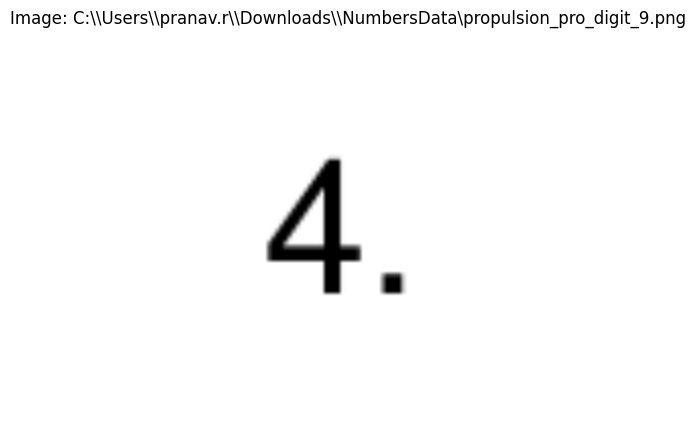

Predicted Number:4 .


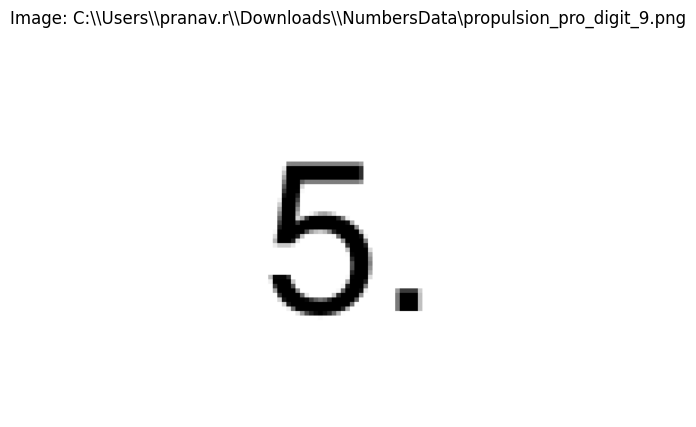

Predicted Number:5.


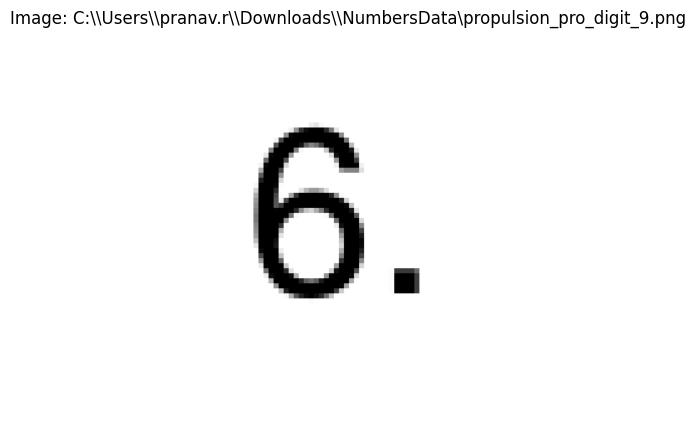

Predicted Number:6.


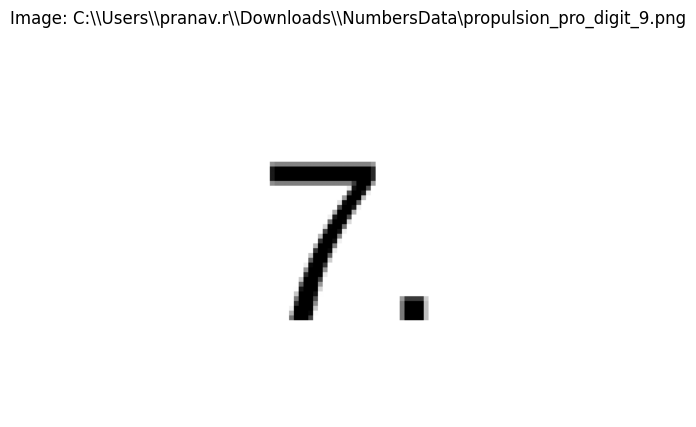

Predicted Number:7.


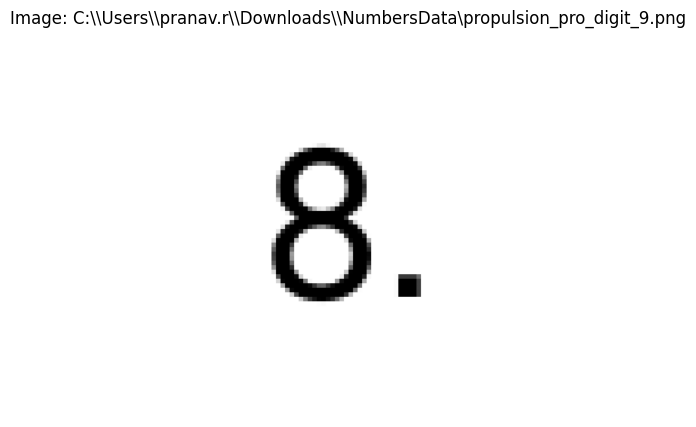

Predicted Number:8 .


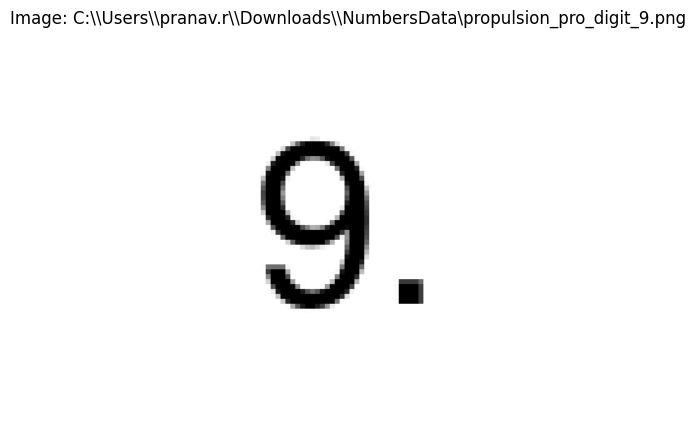

Predicted Number:9.
Model Name:trocr_base_handwritten


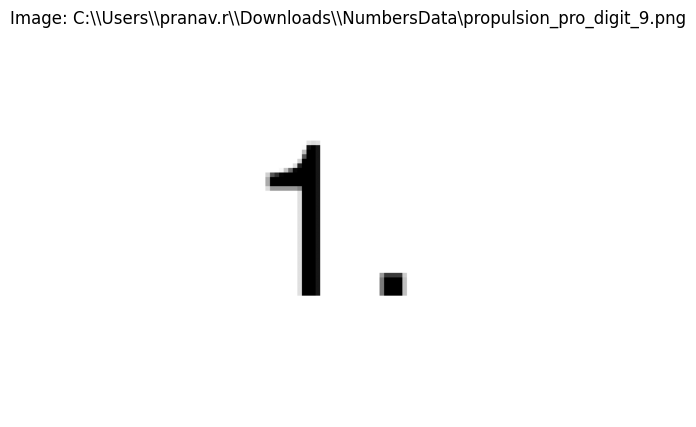

Predicted Number:1.


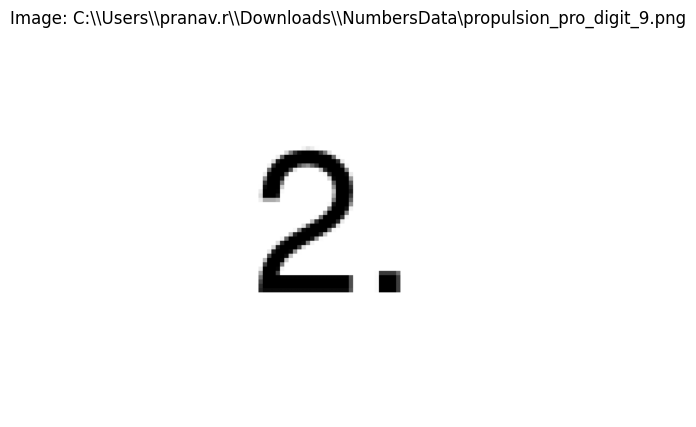

Predicted Number:2.


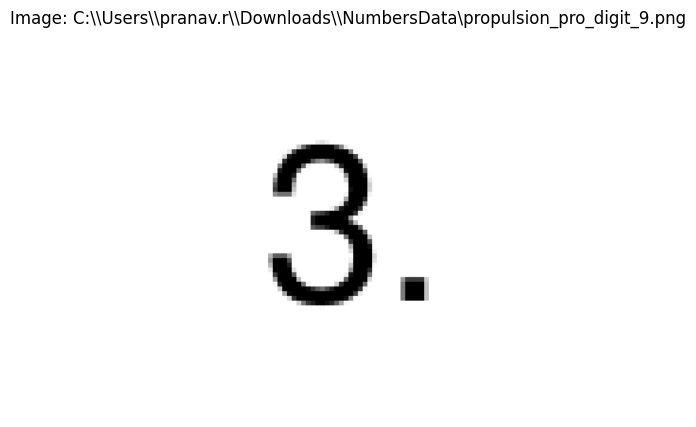

Predicted Number:3. 3 .


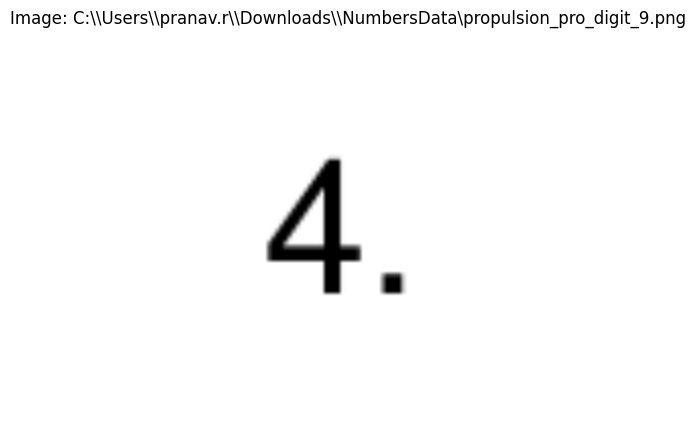

Predicted Number:4 .


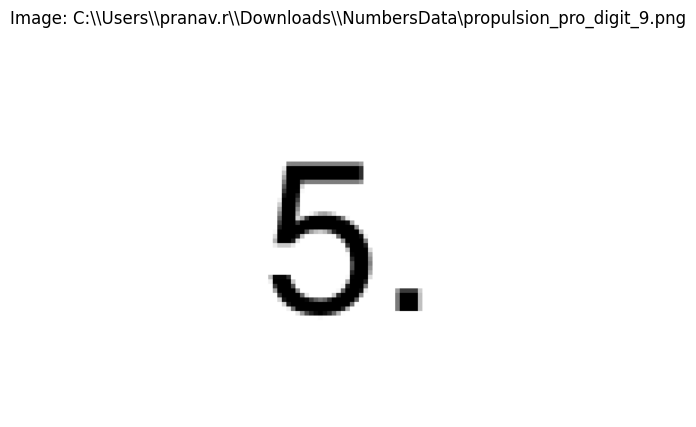

Predicted Number:5.


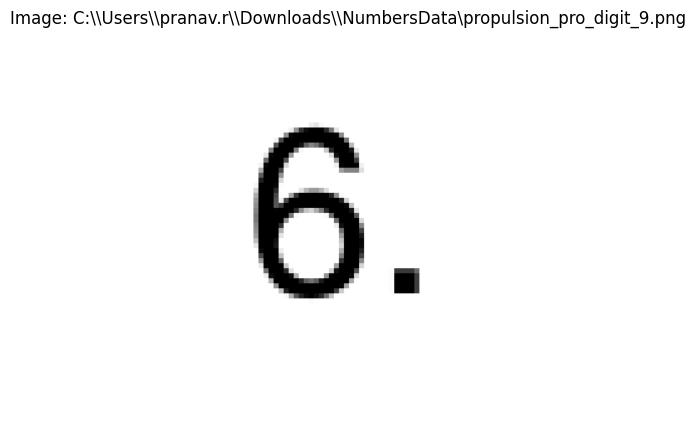

Predicted Number:6.


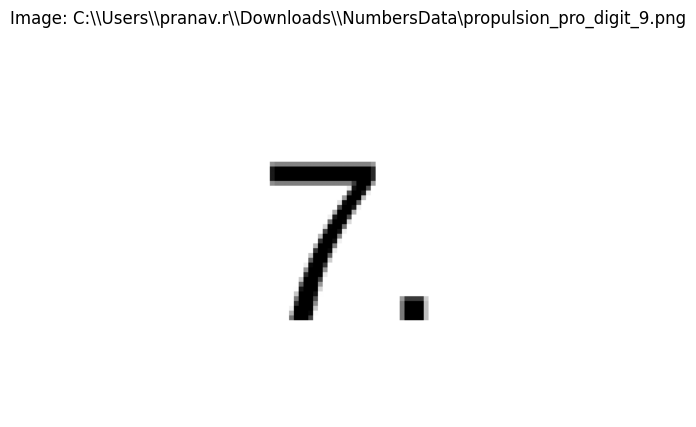

Predicted Number:7.


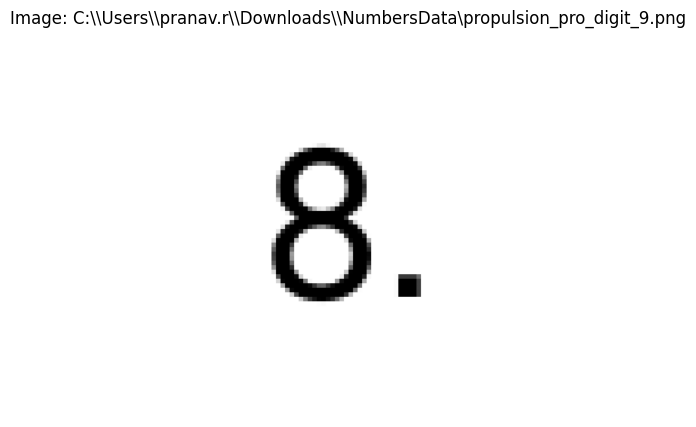

Predicted Number:8 .


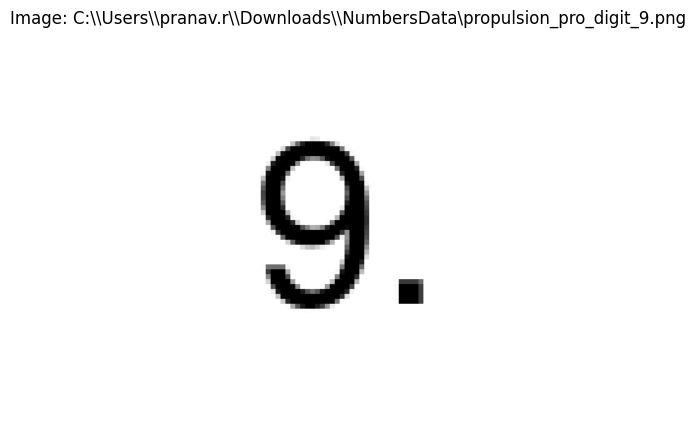

Predicted Number:9.


In [72]:
cnt = 1
final_output = []
models = ['Tesseract','EasyOCR','docTR','trocr_large_handwritten','trocr_large_printed','trocr_base_printed_handwritten','model_ocr_fp','trocr_base_handwritten']

for i in range(len(models)):
	print("Model Name:"+str(models[i]))
	prediction = predictions[i]
	for j in range(1,10):
		img = cv2.imread(images[j-1], cv2.IMREAD_GRAYSCALE)
		images.append(image_path)
		plt.figure(figsize=(5, 5))
		plt.imshow(img, cmap='gray')
		plt.title(f"Image: {image_path}")
		plt.axis('off')  # Turn off axis
		plt.show()
		print("Predicted Number:"+str(prediction[j-1]))
		final_output.append({
					"Model": models[i],
					"Actual": j,
					"Prediction": prediction[j-1],
					"Average Execution Time": avg_excution_time[i]
				})
			
		


In [73]:
final_output

[{'Model': 'Tesseract',
  'Actual': 1,
  'Prediction': '1.',
  'Average Execution Time': 0.2493},
 {'Model': 'Tesseract',
  'Actual': 2,
  'Prediction': '2.',
  'Average Execution Time': 0.2493},
 {'Model': 'Tesseract',
  'Actual': 3,
  'Prediction': '3.',
  'Average Execution Time': 0.2493},
 {'Model': 'Tesseract',
  'Actual': 4,
  'Prediction': '4.',
  'Average Execution Time': 0.2493},
 {'Model': 'Tesseract',
  'Actual': 5,
  'Prediction': '2.',
  'Average Execution Time': 0.2493},
 {'Model': 'Tesseract',
  'Actual': 6,
  'Prediction': '6.',
  'Average Execution Time': 0.2493},
 {'Model': 'Tesseract',
  'Actual': 7,
  'Prediction': '.',
  'Average Execution Time': 0.2493},
 {'Model': 'Tesseract',
  'Actual': 8,
  'Prediction': 'No Prediction',
  'Average Execution Time': 0.2493},
 {'Model': 'Tesseract',
  'Actual': 9,
  'Prediction': '.',
  'Average Execution Time': 0.2493},
 {'Model': 'EasyOCR',
  'Actual': 1,
  'Prediction': 1,
  'Average Execution Time': 6.9943},
 {'Model': 'Easy

In [74]:
import pandas as pd
# Convert the results into a pandas DataFrame
df_results = pd.DataFrame(final_output)

# Save the DataFrame to a CSV file
df_results.to_csv('ocr_results.csv', index=False)

# Print the DataFrame
print(df_results)

                     Model  Actual Prediction  Average Execution Time
0                Tesseract       1         1.                 0.24930
1                Tesseract       2         2.                 0.24930
2                Tesseract       3         3.                 0.24930
3                Tesseract       4         4.                 0.24930
4                Tesseract       5         2.                 0.24930
..                     ...     ...        ...                     ...
67  trocr_base_handwritten       5         5.                 1.09526
68  trocr_base_handwritten       6         6.                 1.09526
69  trocr_base_handwritten       7         7.                 1.09526
70  trocr_base_handwritten       8        8 .                 1.09526
71  trocr_base_handwritten       9         9.                 1.09526

[72 rows x 4 columns]
